### f_0 loading funtion

In [28]:
from PIL import Image
import os
import numpy as np

def load_data(load_file_path):
    # Funktion zum Laden von Daten aus dem Ordner load_file_path als TIFF
    # Argument: load_file_path als String
    image_array = []  # Leeres Array zum Speichern der Bilder

    # Iteriere über die Dateien im Ordner
    for file_name in os.listdir(load_file_path):
        file_path = os.path.join(load_file_path, file_name)

        # Überprüfe, ob die Datei ein unterstütztes Bildformat hat
        if file_name.endswith(('.png', '.PNG', '.jpg', '.JPG', '.jpeg', '.JPEG', '.tiff', '.TIFF', '.tif', '.TIF')):
            # Lade das Bild mit PIL
            pil_image = Image.open(file_path)

            # Überprüfe den Datentyp des Bildes
            if isinstance(pil_image, np.ndarray):
                # Wenn das Bild bereits ein NumPy-Array ist, füge es direkt zum Array hinzu
                image_array.append(pil_image)
            else:
                # Wenn das Bild ein PIL Image-Objekt ist, konvertiere es in ein NumPy-Array und füge es hinzu
                image_array.append(np.array(pil_image))

    return image_array

### f_1.1 plotting function rgb

In [29]:
import math
import matplotlib.pyplot as plt

def visualization_w_plt_subplots(array_images, array_titles, subplot_column_num, subplot_width, subplot_height):
    # This function is used to visualize the results using Matplotlib.
    # Visualization of results using Matplotlib
    row_num = math.ceil(len(array_images) / subplot_column_num)
    num_name = 0
    if len(array_titles)==0:
        array_titles = []
        for title in range(len(array_images)):
            title = str(num_name+1)
            array_titles.append(title)
            num_name = num_name + 1

    if row_num == 1 and subplot_column_num == 1:
        plt.figsize=(subplot_width, subplot_height)
        plt.imshow(array_images[0])
        plt.title(array_titles[0])
    else:
        if subplot_column_num == 1:
            # Create subplots with a single coloumn
            fig, axes = plt.subplots(row_num, 1, figsize=(subplot_width, subplot_height))
            for j in range(len(array_images)):
                axes[j].imshow(array_images[j])
                axes[j].set_title(array_titles[j])
        
        else:
            if row_num == 1 or row_num < 0:
                # Create subplots with a single row
                fig, axes = plt.subplots(1, subplot_column_num, figsize=(subplot_width, subplot_height))
                for j in range(len(array_images)):
                    axes[j].imshow(array_images[j])
                    axes[j].set_title(array_titles[j])
            else:
                # Create subplots with multiple rows
                fig, axes = plt.subplots(row_num, subplot_column_num, figsize=(subplot_width, subplot_height))

                for i in range(row_num):
                    start_index = i * subplot_column_num
                    end_index = min((i + 1) * subplot_column_num, len(array_images))
                    images = array_images[start_index:end_index]
                    titles = array_titles[start_index:end_index]

                    for j in range(len(images)):
                        axes[i, j].imshow(images[j])
                        axes[i, j].set_title(titles[j])

                    # Hide the remaining subplots if there are fewer than subplot_column_num images in the group
                    if len(images) < subplot_column_num:
                        for k in range(len(images), subplot_column_num):
                            axes[i, k].axis("off")

    plt.tight_layout()
    plt.show()

### f_1.2 plotting function gray

In [30]:
import math
import matplotlib.pyplot as plt

def visualization_w_plt_subplots_gray(array_images, array_titles, subplot_column_num, subplot_width, subplot_height):
    # This function is used to visualize the results using Matplotlib.
    # Visualization of results using Matplotlib
    row_num = math.ceil(len(array_images) / subplot_column_num)

    if row_num == 1 and subplot_column_num == 1:
        plt.figsize=(subplot_width, subplot_height)
        plt.imshow(array_images[0], cmap='gray')  # Specify cmap='gray' for grayscale images
        plt.title(array_titles[0])
    else:
        if subplot_column_num == 1:
            # Create subplots with a single column
            fig, axes = plt.subplots(row_num, 1, figsize=(subplot_width, subplot_height))
            for j in range(len(array_images)):
                axes[j].imshow(array_images[j], cmap='gray')  # Specify cmap='gray' for grayscale images
                axes[j].set_title(array_titles[j])
        
        else:
            if row_num == 1 or row_num < 0:
                # Create subplots with a single row
                fig, axes = plt.subplots(1, subplot_column_num, figsize=(subplot_width, subplot_height))
                for j in range(len(array_images)):
                    axes[j].imshow(array_images[j], cmap='gray')  # Specify cmap='gray' for grayscale images
                    axes[j].set_title(array_titles[j])
            else:
                # Create subplots with multiple rows
                fig, axes = plt.subplots(row_num, subplot_column_num, figsize=(subplot_width, subplot_height))

                for i in range(row_num):
                    start_index = i * subplot_column_num
                    end_index = min((i + 1) * subplot_column_num, len(array_images))
                    images = array_images[start_index:end_index]
                    titles = array_titles[start_index:end_index]

                    for j in range(len(images)):
                        axes[i, j].imshow(images[j], cmap='gray')  # Specify cmap='gray' for grayscale images
                        axes[i, j].set_title(titles[j])

                    # Hide the remaining subplots if there are fewer than subplot_column_num images in the group
                    if len(images) < subplot_column_num:
                        for k in range(len(images), subplot_column_num):
                            axes[i, k].axis("off")

    plt.tight_layout()
    plt.show()


### f_3.1 canny corner detection

In [31]:
import cv2

def image_contours_detection(image_bgr, gaus_blur_ksize, gaus_blur_sigmaX, canny_threshold1, canny_threshold2, canny_aperture_size, dilate_kernel, dilate_iterations, find_cont_mode, find_cont_method):
    # Bild von BRG zu RGB Format
    image_rgb_org = cv2.cvtColor(np.array(image_bgr), cv2.COLOR_BGR2RGB)
    
    # Bild wird von BGR zu gray-scale gewandelt
    gray_image = cv2.cvtColor(np.array(image_bgr), cv2.COLOR_BGR2GRAY)
    
    # Bild wird mit der openCv Funktion "gaussianBlur" unschärfer gemacht
    blur_image = cv2.GaussianBlur(gray_image, gaus_blur_ksize, gaus_blur_sigmaX)
    # Parameter: ksize=(11,11); ksize:Die Größe des Gauß-Filters als Tupel (Breite, Höhe). Größere Werte führen zu einer stärkeren Glättung des Bildes.
    #            sigmaX=0; sigmaX:Die Standardabweichung des Gauß-Filters. Größere Werte führen zu einer stärkeren Glättung des Bildes.

    # Diese Funktion führt die Kantenextraktion mit dem Canny-Algorithmus durch
    canny_image = cv2.Canny(blur_image, canny_threshold1, canny_threshold2, canny_aperture_size)
    # Parameter: threshold1=30; threshold1: Der erste Schwellenwert für die Hysterese. Kanten mit Gradientenwerten größer als threshold2 werden als starke Kanten betrachtet.
    #            threshold2=150; threshold2: Der zweite Schwellenwert für die Hysterese. Kanten mit Gradientenwerten kleiner als threshold1 werden als schwache Kanten betrachtet.
    #            apertureSize=3; apertureSize: Die Größe des Sobel-Kernels zur Berechnung der Gradienten. Der Standardwert ist 3.   


    # Diese Funktion führt eine Dilatation (Ausdehnung) auf dem Bild durch
    dilated_image = cv2.dilate(canny_image, dilate_kernel, iterations=dilate_iterations)
    # Parameter: kernel=(1,1); kernel: Die Strukturierungsmatrix (Kernel) für die Dilatation. Es kann verwendet werden, um die Form der ausgedehnten Objekte zu kontrollieren.
    #            iterations=0; iterations: Die Anzahl der Iterations für die Dilatation. Je größer der Wert, desto stärker wird das Bild ausgedehnt.


    # Diese Funktion findet Konturen im binären Bild
    (cnt, hierarchy) = cv2.findContours(dilated_image.copy(), find_cont_mode, find_cont_method)
    # Parameter: mode=cv2.RETR_EXTERNAL; Die Kontur-Rückverfolgungsmodi. Häufig verwendete Modi sind cv2.RETR_EXTERNAL (nur die äußeren Konturen) und cv2.RETR_TREE (alle Konturen mit Hierarchie)
    #            method=cv2.CHAIN_APPROX_NONE; method: Die Approximationsmethode für die Kontur. Häufig verwendete Methoden sind cv2.CHAIN_APPROX_NONE (keine Approximation, alle Punkte der Kontur
    #                                                  werden beibehalten) und cv2.CHAIN_APPROX_SIMPLE (nur die Endpunkte der Kontur werden beibehalten).


    # Diese Funktion wandelt das Bild von BGR zu RGB-Format
    image_rgb_contours = cv2.cvtColor(np.array(image_bgr), cv2.COLOR_BGR2RGB)

    # Diese Funktion zeichnet die Konturen auf dem Bild in RGB-Format (hier: grün)
    cv2.drawContours(image_rgb_contours, cnt, -1, (0, 255, 0), 1)

    array_images=[image_rgb_org, gray_image, blur_image, canny_image, dilated_image, image_rgb_contours]
    array_titles=['image_rgb_org', 'gray_image', 'blur_image', 'canny_image', 'dilated_image', 'image_rgb_contours_detect: ' + str(len(cnt))]

    # Rückgabe aller Bilder mit Titeln und der Anzahl der Konturen
    return array_images, array_titles, cnt

### f_4.1 color segmentation RGB

In [32]:
# import the necessary packages
import numpy as np
import cv2

def segment_images(image_bgr, cr_green, cr_red, cr_yellow, cr_blue, cr_white, cr_brown, cr_purple): # color ranges in BGR FORMAT
    # define the list of boundaries (lower and upper color bounds)
    boundaries = [ cr_green, cr_red, cr_yellow, cr_blue, cr_white, cr_brown, cr_purple]

    array_image_bgr_color_segmented = []

    # loop over the boundaries
    for (lower, upper) in boundaries:
        # create NumPy arrays from the boundaries for lower and upper bounds
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")

        # find the colors within the specified boundaries and apply the mask
        mask = cv2.inRange(image_bgr, lower, upper)
        output_bgr = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)
        array_image_bgr_color_segmented.append(output_bgr)

    return array_image_bgr_color_segmented


### f_4.2 color segmentation HSV

In [33]:
import numpy as np
import cv2

def segment_images_hsv(image_bgr, cr_green, cr_red_1, cr_red_2, cr_yellow, cr_blue, cr_white, cr_brown, cr_purple): # color ranges in HSV FORMAT
    # convert the image from BGR to HSV color space
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

    # define the list of boundaries (lower and upper color bounds) in HSV format
    boundaries = [cr_green, cr_red_1, cr_red_2 , cr_yellow, cr_blue, cr_white, cr_brown, cr_purple]

    array_image_bgr_color_segmented = []

    # loop over the boundaries
    for (lower, upper) in boundaries:
        # create NumPy arrays from the boundaries for lower and upper bounds
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")

        # find the colors within the specified boundaries and apply the mask
        mask = cv2.inRange(image_hsv, lower, upper)
        output_bgr = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)
        array_image_bgr_color_segmented.append(output_bgr)

            # green = 0; red_1 = 1; red_2 = 2; yellow = 3; blue = 4; white = 5; borwn = 6; purple = 7; 

    red_combined = np.clip(array_image_bgr_color_segmented[1]+ array_image_bgr_color_segmented[2], 0,255)
    array_image_bgr_color_segmented.append(red_combined)
    blue_combined = cv2.subtract(array_image_bgr_color_segmented[4],array_image_bgr_color_segmented[7]).astype(np.uint8)
    array_image_bgr_color_segmented.append(blue_combined)
    substract_image = array_image_bgr_color_segmented[0] + array_image_bgr_color_segmented[3] + array_image_bgr_color_segmented[4]+ array_image_bgr_color_segmented[5]+ array_image_bgr_color_segmented[7] + + array_image_bgr_color_segmented[8]
    brown_combined = cv2.subtract(array_image_bgr_color_segmented[6], substract_image).astype(np.uint8)
    array_image_bgr_color_segmented.append(brown_combined)

    return array_image_bgr_color_segmented

### f_5 function for average color in contour


In [34]:
import numpy as np
import cv2

def draw_contours_with_average_color(array_contour, image):
    # Erstelle eine Kopie des Eingangsbildes, um die Ergebnisse zu zeichnen
    output_image = image.copy()

    # Schleife über die Konturen im array_contour
    for contour in array_contour:
        # Berechne den Durchschnittswert der RGB-Pixel innerhalb der Kontur
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.drawContours(mask, [contour], 0, 255, -1)
        masked_pixels = cv2.bitwise_and(image, image, mask=mask)
        average_color = np.mean(masked_pixels, axis=(0, 1))

        # Zeichne die Kontur und die eingeschlossene Fläche entsprechend dem berechneten Pixelwert ein
        cv2.drawContours(output_image, [contour], 0, average_color.tolist(), -1)

    return output_image

### f_6 function for creating mask

In [35]:
import numpy as np
import cv2

def mask_image_outside_contour(image, contours):
    array_layers =[]
    for contour in contours:

        # Erstelle eine Maske für den Bereich außerhalb der Kontur
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.drawContours(mask, [contour], 0, 255, -1)  # Zeichne die Kontur auf die Maske

        # Setze alle Pixel außerhalb der Kontur auf Schwarz
        layer = cv2.bitwise_and(image, image, mask=mask)
        array_layers.append(layer)
    output_image = np.zeros_like(image)
    for layer in array_layers:
        output_image = output_image + layer
    return output_image

### f_7 color balancing function

In [36]:
import cv2

def apply_color_balance(image_bgr):
    # Konvertierung des Bildes in den LAB-Farbraum
    adjusted_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)

    # Aufteilen des Bildes in die einzelnen Kanäle
    b_channel, g_channel, r_channel = cv2.split(adjusted_image)

    # Erstellen eines adaptiven Histogrammausgleichsobjekts mit den angegebenen Parametern
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Anwendung des Histogrammausgleichs auf den r-Kanal
    clahe_b_channel = clahe.apply(b_channel)

    # Zusammenführen der Kanäle zu einem Bild
    adjusted_image = cv2.merge((clahe_b_channel, g_channel, r_channel))

    # Konvertierung des Bildes zurück zum BGR-Farbraum
    adjusted_image_bgr = cv2.cvtColor(adjusted_image, cv2.COLOR_LAB2BGR)

    return adjusted_image_bgr

# 1.0 loading images

In [37]:
import cv2

load_file_path = r"C:\Users\SeppG\VdKI\00_project_abgabe\00_data\11_data_testing_build_11_2"
array_image_rgb = load_data(load_file_path)
print( 'A total of {} images were loaded.'.format(len(array_image_rgb)))

test_image_rgb = array_image_rgb[2]
test_image_bgr = cv2.cvtColor(test_image_rgb, cv2.COLOR_RGB2BGR)
print("Choosen test image:")
plt.imshow(test_image_rgb)
plt.show()

A total of 9 images were loaded.
Choosen test image:


# 1.2 image color adjusting
The aim is to reduce the effects of deviationg lighting conditions

In [38]:
image_bgr_adjusted = apply_color_balance(test_image_bgr)
image_rgb_adjusted = cv2.cvtColor(image_bgr_adjusted, cv2.COLOR_BGR2RGB)

array_image_comparison =[test_image_rgb,image_rgb_adjusted]
array_title_ic =["original_image", "adjusted_image"]

visualization_w_plt_subplots(array_image_comparison, array_title_ic, 2, 15, 15)


# 2.1 Feature: Number of Contours on blurred image
 Canny alogrithm for contour detection  with find_cont_mode = cv2.RETR_EXTERNAL is good non superimposed Rittersporttafeln
 
 The aim is to estimate the numbers by number of contours --> the hight the number of contours the higher the number of Rittersporttafeln

there were 140 contours in the image


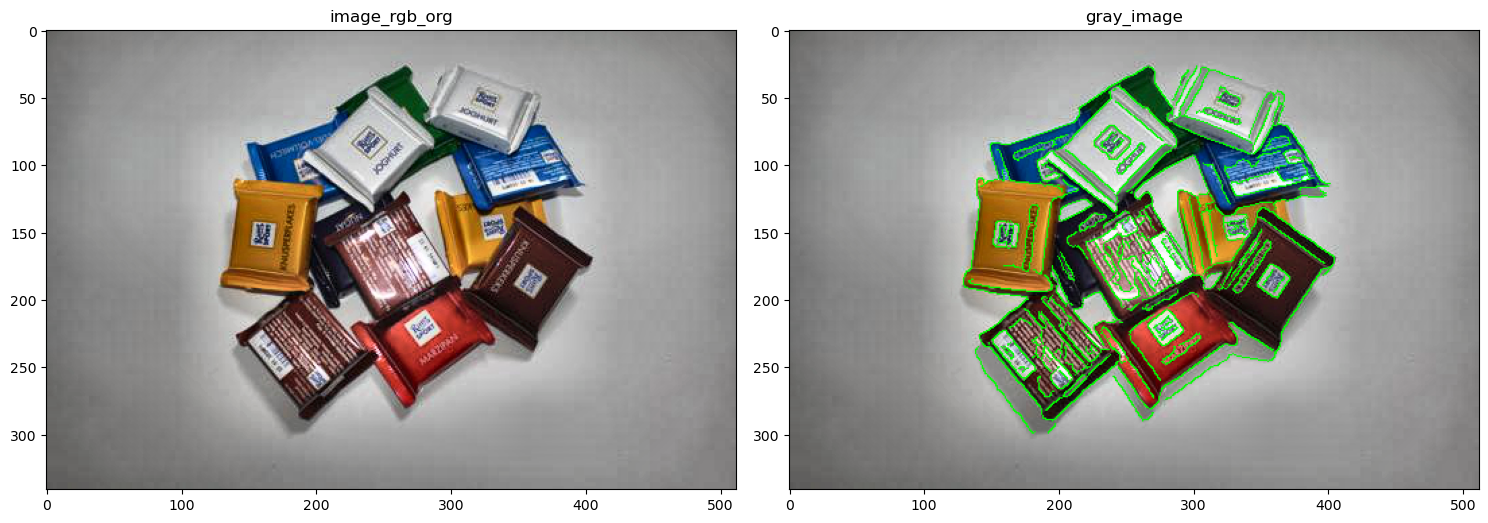

In [39]:
gaus_blur_ksize = (13, 13)
gaus_blur_sigmaX = 1.5 #0.1
canny_threshold1 = 30
canny_threshold2 = 120
canny_aperture_size = 3
dilate_kernel = (1, 1)
dilate_iterations = 0
find_cont_mode =cv2.RETR_TREE
#find_cont_mode = cv2.RETR_EXTERNAL
find_cont_method = cv2.CHAIN_APPROX_NONE

array_image_canny_f_2_1, array_titles_canny_f_2_1, contour_canny_f_2_1 = image_contours_detection(image_bgr_adjusted, gaus_blur_ksize, gaus_blur_sigmaX, canny_threshold1, canny_threshold2, canny_aperture_size, dilate_kernel, dilate_iterations, find_cont_mode, find_cont_method)

print("there were {} contours in the image".format(len(contour_canny_f_2_1)))

visualization_w_plt_subplots([array_image_canny_f_2_1[0],array_image_canny_f_2_1[5]], array_titles_canny_f_2_1,2, 15, 15)

# 2.2 Feature collective area of canny contour
the aim is to estimate the number by area --> the greater the area the hight the number of rittersporttafeln

In [40]:
total_area = 0

# Iterate over the contours and add the area of each contour to the total area
for contour in contour_canny_f_2_1:
    area = cv2.contourArea(contour)
    total_area += area

# Print the total area
print("Total area of contours:", total_area)

Total area of contours: 7920.0


# 2.3 Feature matching ORB Rittersport front and back side
the number of matche give information about the number of Rittersport logos --> easier to implement than template matching

A total of 12 images were loaded.


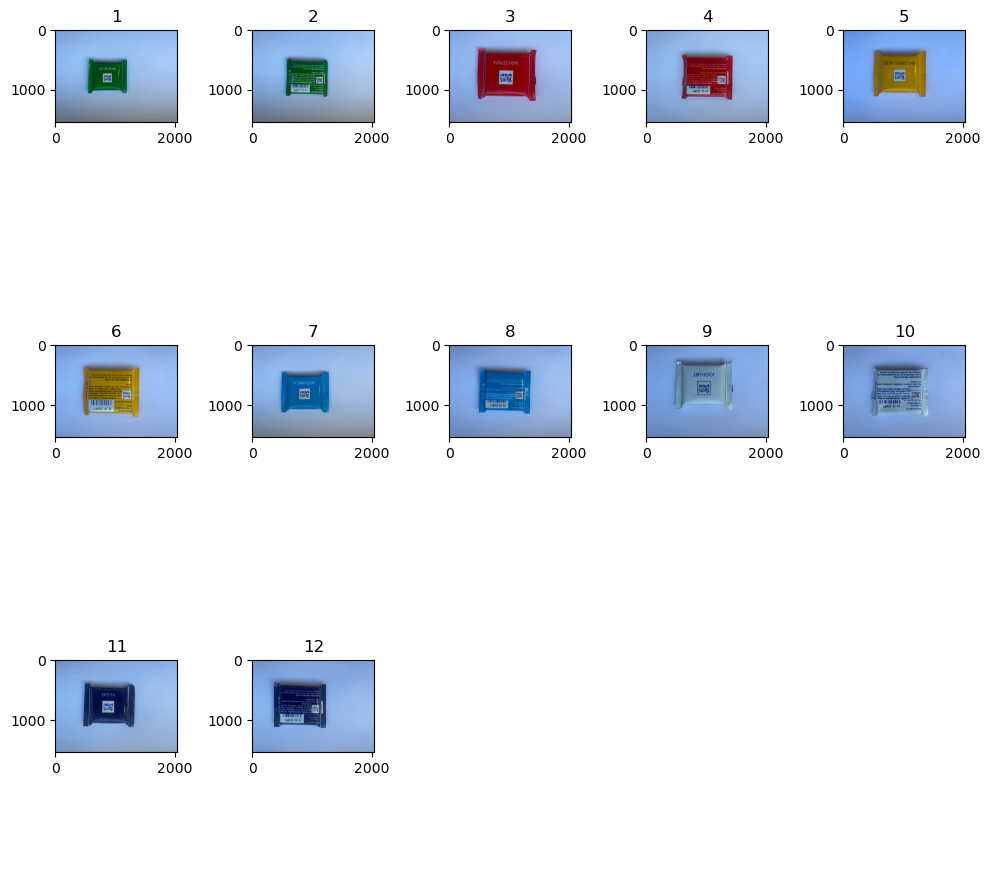

In [41]:
load_file_path_orb = r"C:\Users\SeppG\VdKI\00_project_abgabe\02_image_features\ORB_images_13_1"
array_image_rgb_ORB = load_data(load_file_path_orb)

print( 'A total of {} images were loaded.'.format(len(array_image_rgb_ORB)))
visualization_w_plt_subplots(array_image_rgb_ORB, [],5, 10, 10)

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#******************************************
status_show_ORB = 0

array_image_bgr_ORB =[]
for image_rgb in array_image_rgb_ORB:
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    array_image_bgr_ORB.append(image_bgr)

image_gray_query = cv2.cvtColor(image_bgr_adjusted, cv2.COLOR_BGR2GRAY)

keypoints_matches_front_number = 0
keypoints_matches_back_number = 0
k=0
for image_bgr_train in array_image_bgr_ORB:
    # adjust BGR to Gray Colorformat
    image_gray_train = cv2.cvtColor(image_bgr_train, cv2.COLOR_RGB2GRAY)

    # Initiate ORB detector
    orb = cv2.ORB_create()
    # find the keypoints and descriptors with ORB
    keypoints_query, descriptors_query = orb.detectAndCompute(image_gray_query,None)
    keypoints_train, descriptors_train = orb.detectAndCompute(image_gray_train,None)

    if status_show_ORB == 1:
        # Information zu Keypoints und Descriptoren ausgeben
        print("Anzahl der Keypoints in query-Bild:", len(keypoints_query))
        print("Anzahl der Keypoints in train-Bild:", len(keypoints_train))
        print("Shape der Descriptoren in query-Bild:", descriptors_query.shape)
        print("Shape der Descriptoren in train-Bild:", descriptors_train.shape)

    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(descriptors_query,descriptors_train)

    k+=1
    if k % 2 ==1:
        keypoints_matches_front_number = keypoints_matches_front_number + len(matches)
    else:
        keypoints_matches_back_number = keypoints_matches_back_number + len(matches)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    # Draw  matches.
    image_gray_matched_features = cv2.drawMatches(image_gray_query, keypoints_query, image_gray_train, keypoints_train, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Adjusting color of the image
    image_rgb_query = cv2.cvtColor(image_bgr_adjusted, cv2.COLOR_BGR2RGB)
    image_rgb_train = cv2.cvtColor(image_bgr_train, cv2.COLOR_BGR2RGB)

    if status_show_ORB == 1:
        print("There were ", len(matches), " mateches found")

        # Subplots erstellen
        fig, axs = plt.subplots(1, 3, figsize=(15, 15))

        # Plot des Originalbildes
        axs[0].imshow(image_rgb_query)
        axs[0].set_title("image_rgb_query")

        # Plot des Graustufenbildes
        axs[1].imshow(image_rgb_train)
        axs[1].set_title("image_rgb_train")

        # Plot des Bildes mit Keypunkten
        axs[2].imshow(image_gray_matched_features)
        axs[2].set_title("image_gray_matched_features")

        # Achsentitel ausblenden
        for ax in axs:
            ax.axis("on")

        # Anzeige der Plots
        plt.show()
    

print("There were ", keypoints_matches_front_number, " front side matches." )
print("There were ", keypoints_matches_back_number, " back side matches." )

There were  761  front side matches.
There were  822  back side matches.


# 2.4 Feature Color segmentation
the aim is to seperate and distinguish color of each rittersporttafel --> the hight the number of color areas the higher the amount of rittersporttafeln

## 2.4.0 Preparing image 

In [43]:
gaus_blur_ksize = (55, 55)
gaus_blur_sigmaX = 0.7 #0.1
canny_threshold1 = 50
canny_threshold2 = 250
canny_aperture_size = 3
dilate_kernel = (33, 33)
dilate_iterations = 0
find_cont_mode = cv2.RETR_EXTERNAL
find_cont_method = cv2.CHAIN_APPROX_NONE

array_image_canny_f_2_4, array_titles_canny_f_2_4, contour_canny_f_testing_2_4 = image_contours_detection(image_bgr_adjusted, gaus_blur_ksize, gaus_blur_sigmaX, canny_threshold1, canny_threshold2, canny_aperture_size, dilate_kernel, dilate_iterations, find_cont_mode, find_cont_method)

print("there were {} contours in the image".format(len(contour_canny_f_testing_2_4)))
subplot_column_num = 2
subplot_width = 15
subplot_height =15
visualization_w_plt_subplots([array_image_canny_f_2_4[0],array_image_canny_f_2_4[5]], array_titles_canny_f_2_4,subplot_column_num, subplot_width, subplot_height)

there were 70 contours in the image


In [44]:
total_area_2_4 = 0

# Iterate over the contours and add the area of each contour to the total area
for contour in contour_canny_f_testing_2_4:
    area = cv2.contourArea(contour)
    total_area_2_4 += area

# Print the total area
print("Total area of contours:", total_area_2_4)

Total area of contours: 13290.5


In [45]:
cut_test_image_bgr_2_4 = mask_image_outside_contour(image_bgr_adjusted, contour_canny_f_testing_2_4)
cut_test_image_rgb_2_4 = cv2.cvtColor(cut_test_image_bgr_2_4, cv2.COLOR_BGR2RGB)

plt.imshow(cut_test_image_rgb_2_4)
plt.show()

In [46]:
gaus_blur_ksize = (55, 55)
gaus_blur_sigmaX = 0.2 #0.1
canny_threshold1 = 50
canny_threshold2 = 250
canny_aperture_size = 3
dilate_kernel = (33, 33)
dilate_iterations = 5
find_cont_mode = cv2.RETR_EXTERNAL
find_cont_method = cv2.CHAIN_APPROX_NONE

array_image_canny_f_2_4, array_titles_canny_f_2_4, contour_canny_f_testing_2_4 = image_contours_detection(cut_test_image_bgr_2_4, gaus_blur_ksize, gaus_blur_sigmaX, canny_threshold1, canny_threshold2, canny_aperture_size, dilate_kernel, dilate_iterations, find_cont_mode, find_cont_method)

print("there were {} contours in the image".format(len(contour_canny_f_testing_2_4)))
subplot_column_num = 2
subplot_width = 15
subplot_height =15
visualization_w_plt_subplots([array_image_canny_f_2_4[0],array_image_canny_f_2_4[5]], array_titles_canny_f_2_4,subplot_column_num, subplot_width, subplot_height)

there were 1 contours in the image


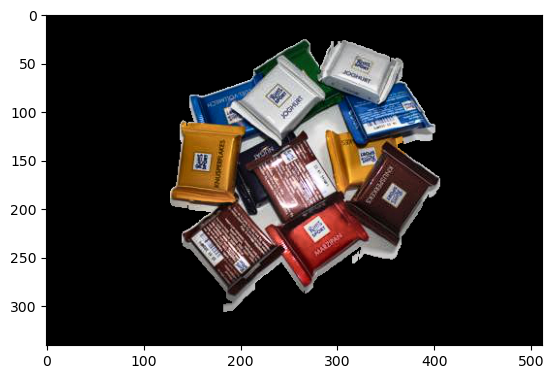

In [47]:
cut_test_image_bgr_2_41 = mask_image_outside_contour(image_bgr_adjusted, contour_canny_f_testing_2_4)
cut_test_image_rgb_2_41 = cv2.cvtColor(cut_test_image_bgr_2_41, cv2.COLOR_BGR2RGB)

plt.imshow(cut_test_image_rgb_2_41)
plt.show()

# 2.4.1 HSV Color segmentation

11


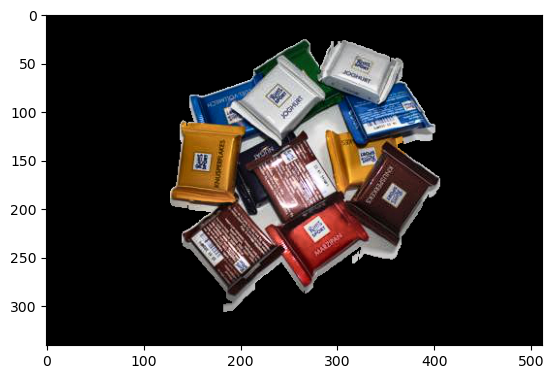

In [48]:
# color rang preset for each color 
#           HSV FORMATTYPE: HSV ranges between (0-180, 0-255, 0-255)
#        ([hue_lower, saturation_lower, value_lower],[hue_upper, saturation_upper, value_upper])

cr_green_2 = ([45,50,5], [75,255,254])

cr_red_2_1 = ([0,147,111], [6,255,255])
cr_red_2_2 = ([154,166,66], [180,255,255])

cr_yellow_2 = ([14,25,0], [25,255,254])

cr_blue_2 = ([85,70,25], [125,255,255]) 

cr_white_2 = ([0,0,200], [180,30,255])

cr_brown_2 = ([0,0,0],[180,197,103])

cr_purple_2 = ([103,0,0],[168,215,69])

array_image_bgr_from_hsv_segmented_2 = segment_images_hsv(cut_test_image_bgr_2_41, cr_green_2, cr_red_2_1, cr_red_2_2, cr_yellow_2, cr_blue_2, cr_white_2, cr_brown_2, cr_purple_2)


array_image_rgb_from_hsv_segmented_2 = []
for image_bgr in array_image_bgr_from_hsv_segmented_2:
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    array_image_rgb_from_hsv_segmented_2.append(image_rgb)

print(len(array_image_rgb_from_hsv_segmented_2))

array_title_hsv = ["green",  "red_1", "red_2", "yellow", "blue", "white", "brown", "purple", "red_combined", "blue_combined", "brown_combined"]

plt.imshow(cut_test_image_rgb_2_41)
plt.show()

subplot_column_num = 3
subplot_width = 15
subplot_height =15
visualization_w_plt_subplots(array_image_rgb_from_hsv_segmented_2, array_title_hsv,subplot_column_num, subplot_width, subplot_height)

In [49]:
array_image_rgb_selected_2_4 = [array_image_rgb_from_hsv_segmented_2[0],array_image_rgb_from_hsv_segmented_2[3],array_image_rgb_from_hsv_segmented_2[5],
                                array_image_rgb_from_hsv_segmented_2[7],array_image_rgb_from_hsv_segmented_2[8],array_image_rgb_from_hsv_segmented_2[9],array_image_rgb_from_hsv_segmented_2[10]]
array_image_bgr_selected_2_4 = []
for image_rgb in array_image_rgb_selected_2_4:
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    array_image_bgr_selected_2_4.append(image_bgr)


#### filtering the segmented images

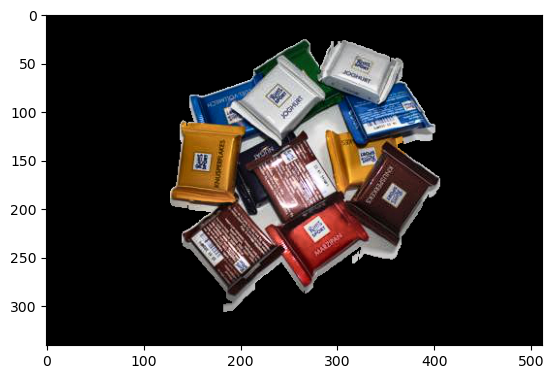

In [50]:
# Median Blur: This technique replaces each pixel value with the median value in its neighborhood, which is effective in removing salt-and-pepper noise.
# Bilateral Filter: This technique preserves the edges in the image while reducing noise by considering both spatial and intensity differences.

array_image_bgr_medianblur = []
for image_bgr in array_image_bgr_selected_2_4:
    image_blurred = cv2.medianBlur(image_bgr, 7)
    array_image_bgr_medianblur.append(image_blurred)

array_image_bgr_bilateral = []
for image_bgr in array_image_bgr_medianblur:
    image_bgr = cv2.bilateralFilter(image_bgr, 19 , 75, 75)
    array_image_bgr_bilateral.append(image_bgr)

array_image_rgb_bilateral =[]
for image_bgr in array_image_bgr_bilateral:
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    array_image_rgb_bilateral.append(image_rgb)

array_title_mb = ["green", "yellow", "white", "purple", "red_combined", "blue_combined", "brown_combined"]

plt.imshow(cut_test_image_rgb_2_41)
plt.show()

visualization_w_plt_subplots(array_image_rgb_bilateral, array_title_mb, 3, 15, 15)

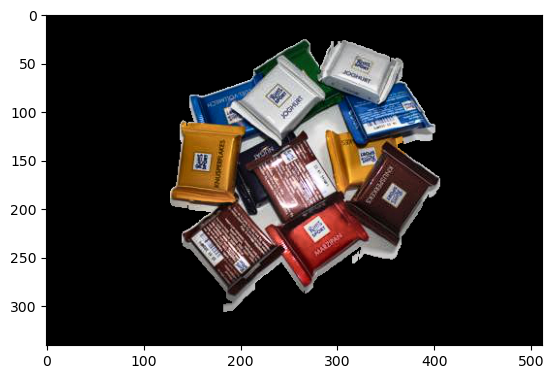

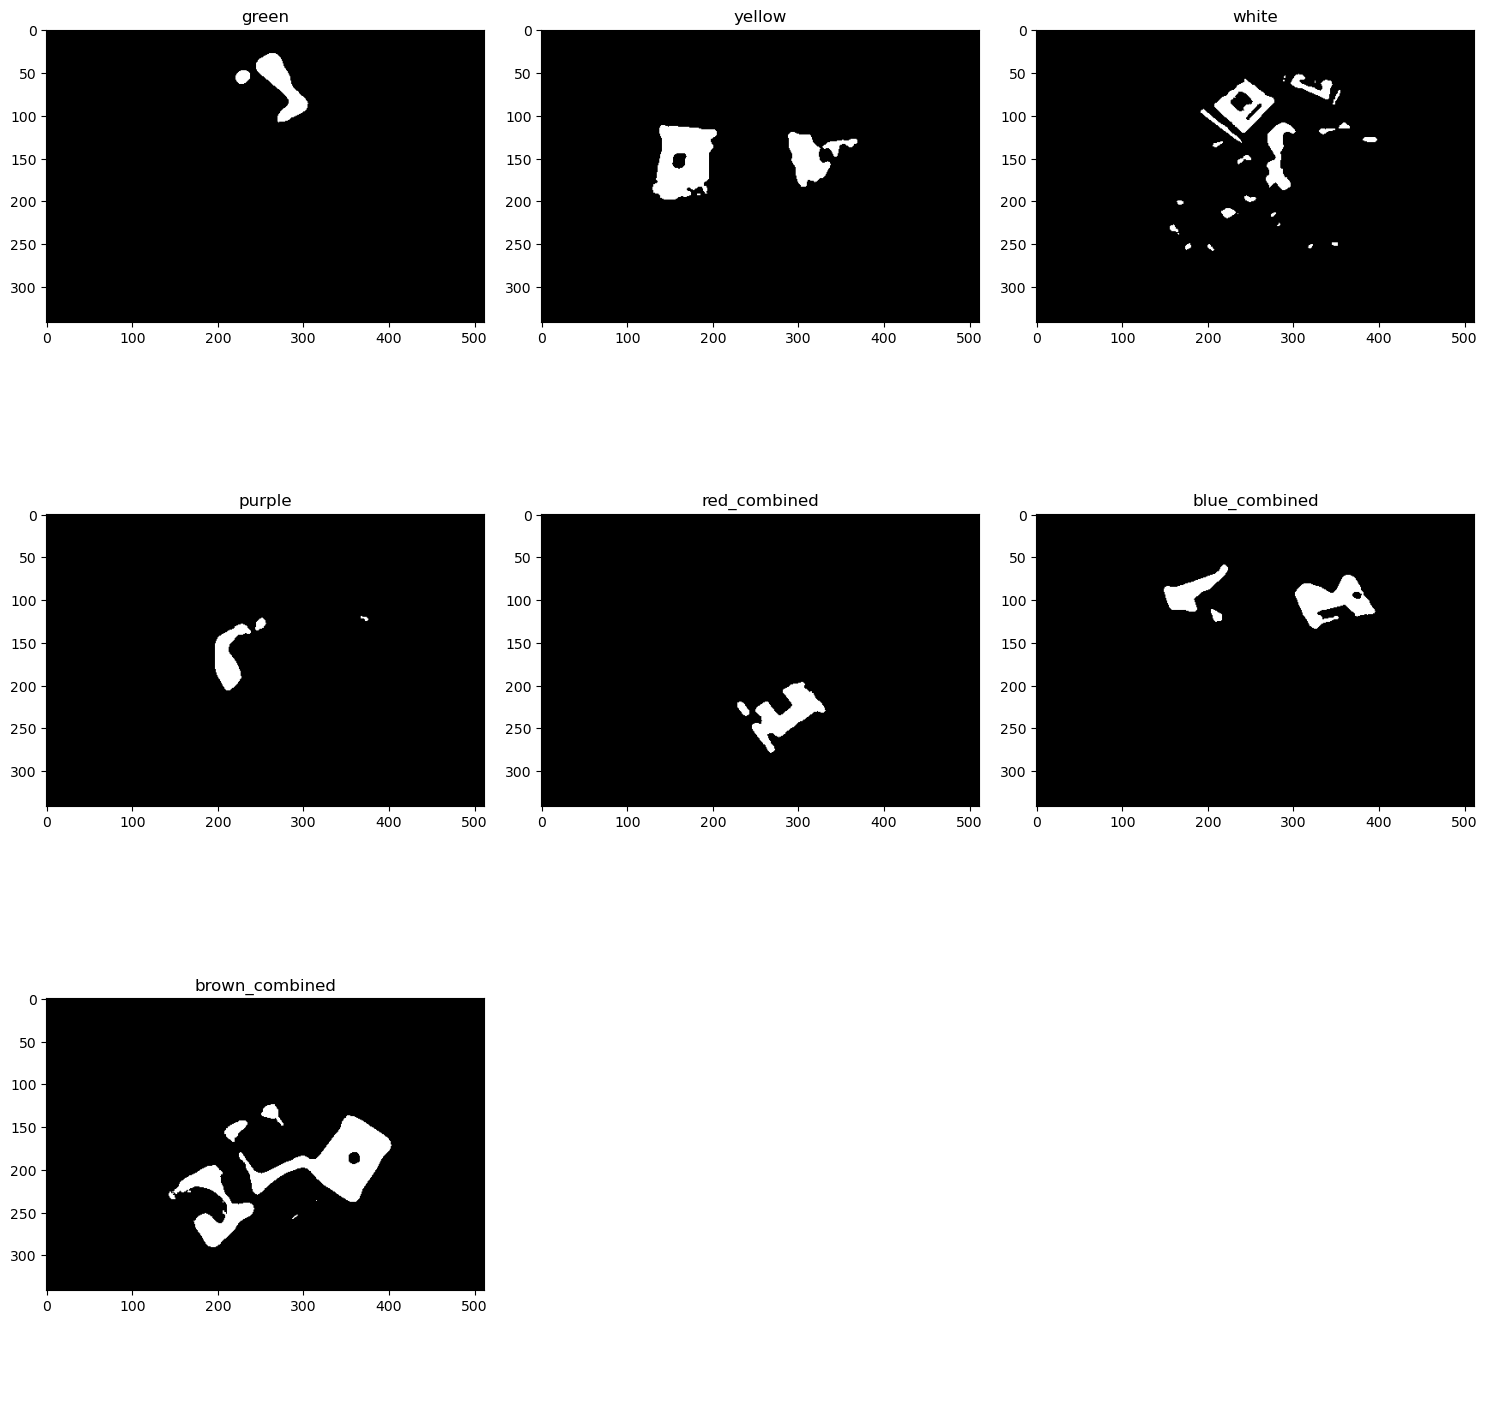

In [51]:
# transformation to binary color space for higher contrast
threshold_value = 5
max_value = 160

array_image_gray_binary =[]
for image_bgr in array_image_bgr_bilateral:
    # Konvertiere das Bild in den richtigen Farbraum (Graustufen)
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

    # Wende eine Schwellenwertoperation an, um das Bild zu binarisieren
    _, binary_image = cv2.threshold(image_gray, threshold_value, max_value, cv2.THRESH_BINARY)
    array_image_gray_binary.append(binary_image)

array_title_gb = ["green", "yellow", "white", "purple", "red_combined", "blue_combined", "brown_combined"]

plt.imshow(cut_test_image_rgb_2_41)
plt.show()

visualization_w_plt_subplots_gray(array_image_gray_binary, array_title_gb, 3, 15, 15)

In [52]:
array_contour_numbers_binary = []
array_image_rgb_color_segmented= []
total_arc_length_with_white = 0
total_arc_length_without_white = 0
total_area_with_white = 0
total_area_without_white = 0

k=0

for image_gray_binary in array_image_gray_binary:
    # Führe eine Konturfindung auf dem binarisierten Bild durch
    contours, _ = cv2.findContours(image_gray_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Berechne die größte Fläche einer Kontur
        largest_area = max([cv2.contourArea(contour) for contour in contours])

        # Iteriere über alle gefundenen Konturen
        filtered_contours = []
        for contour in contours:
            # Überprüfe, ob die Fläche der Kontur mindestens die Hälfte der größten Fläche beträgt
            if cv2.contourArea(contour) >= largest_area / 8:
                filtered_contours.append(contour)
        
        area_sum = 0
        arc_length_sum = 0

        for contour in filtered_contours:
            area = cv2.contourArea(contour)
            arc_length = cv2.arcLength(contour, True)
            area_sum += area
            arc_length_sum += arc_length
        
        if k == 2: # wenn 4 wird das weiß segementierte Bild berechnet
            total_arc_length_with_white += arc_length_sum
            total_area_with_white = area_sum
        else: 
            total_arc_length_with_white += arc_length_sum
            total_arc_length_without_white += arc_length_sum

            total_area_with_white += area_sum
            total_area_without_white += area_sum
    
        # Contour auf Bild kopieren
        test_image_rgb_copy0 = test_image_rgb.copy()
        image_rgb_contours = cv2.drawContours(test_image_rgb_copy0, filtered_contours, -1, (0, 255,0), 3)
        array_image_rgb_color_segmented.append(image_rgb_contours)

        # Zähle die identifizierten Objekte
        count = len(filtered_contours)
        if k  == 0:
            array_contour_numbers_binary.append("green_detect:" + str(count))
            test_image_rgb_copy1 = test_image_rgb.copy()
            image_rgb_green_contour = cv2.drawContours(test_image_rgb_copy1, filtered_contours, -1, (0, 255,0), 3)
        elif k == 1:
            array_contour_numbers_binary.append("yellow_detect:" + str(count))
            test_image_rgb_copy2 = test_image_rgb.copy()
            image_rgb_yellow_contour = cv2.drawContours(test_image_rgb_copy2, filtered_contours, -1, (0, 255,0), 3)
        elif k == 2:
            array_contour_numbers_binary.append("white_detect:" + str(count))
            test_image_rgb_copy3 = test_image_rgb.copy()
            image_rgb_white_contour = cv2.drawContours(test_image_rgb_copy3, filtered_contours, -1, (0, 255,0), 3)
        elif k == 3:
            array_contour_numbers_binary.append("purple_detect:" + str(count))
            test_image_rgb_copy4 = test_image_rgb.copy()
            image_rgb_purple_contour = cv2.drawContours(test_image_rgb_copy4, filtered_contours, -1, (0, 255,0), 3)
        elif k == 4:
            array_contour_numbers_binary.append("red_detect:" + str(count))
            test_image_rgb_copy5 = test_image_rgb.copy()
            image_rgb_red_contour = cv2.drawContours(test_image_rgb_copy5, filtered_contours, -1, (0, 255,0), 3)
        elif k == 5:
            array_contour_numbers_binary.append("blue_detect:" + str(count))
            test_image_rgb_copy6 = test_image_rgb.copy()
            image_rgb_blue_contour = cv2.drawContours(test_image_rgb_copy6, filtered_contours, -1, (0, 255,0), 3)
        elif k == 6:
            array_contour_numbers_binary.append("brown_detect:" + str(count))
            test_image_rgb_copy7 = test_image_rgb.copy()
            image_rgb_brown_contour = cv2.drawContours(test_image_rgb_copy7, filtered_contours, -1, (0, 255,0), 3)
    k += 1

total_arc_length_with_white:  3488.685745716095
total_arc_length_withOUT_white:  2886.4044382572174
total_area_with_white:  21645.0
total_area_withOUT_white:  25953.0


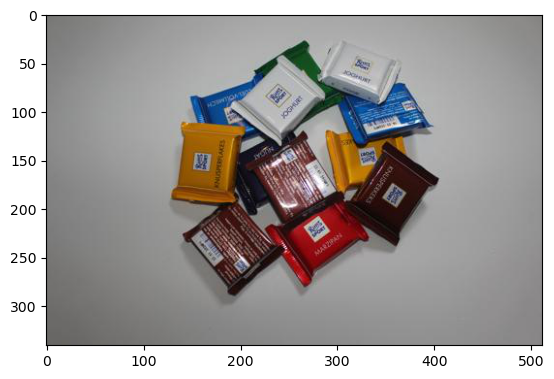

In [54]:
print("total_arc_length_with_white: ", total_arc_length_with_white)
print("total_arc_length_withOUT_white: ", total_arc_length_without_white)
print("total_area_with_white: ", total_area_with_white)
print("total_area_withOUT_white: ", total_area_without_white)



plt.imshow(test_image_rgb)
plt.show()

visualization_w_plt_subplots_gray(array_image_rgb_color_segmented, array_contour_numbers_binary, 3, 15, 15)